# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [184]:
import pandas as pd

data = pd.read_csv('heart.csv')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [185]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [186]:
data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [187]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

/tmp/ipykernel_137166/2093687842.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='viridis')


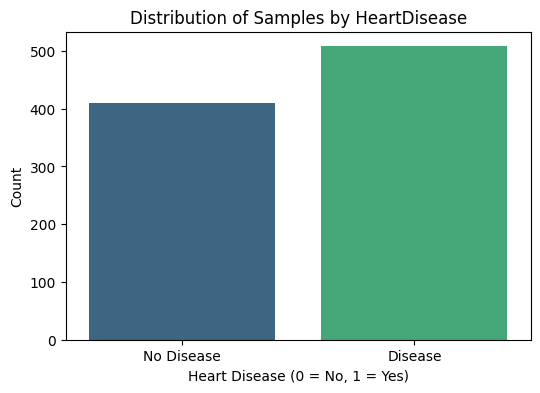

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data, palette='viridis')
plt.title('Distribution of Samples by HeartDisease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [189]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [190]:
correlation_matrix = data_encoded.corr()
correlation_matrix['HeartDisease'].sort_values(ascending=False)


HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.107589
RestingECG_ST        0.102527
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

In [191]:

high_correlation = correlation_matrix[abs(correlation_matrix) > 0.5]
high_correlation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FastingBS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeartDisease,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.554134,-0.622164
Sex_M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType_ATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType_NAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


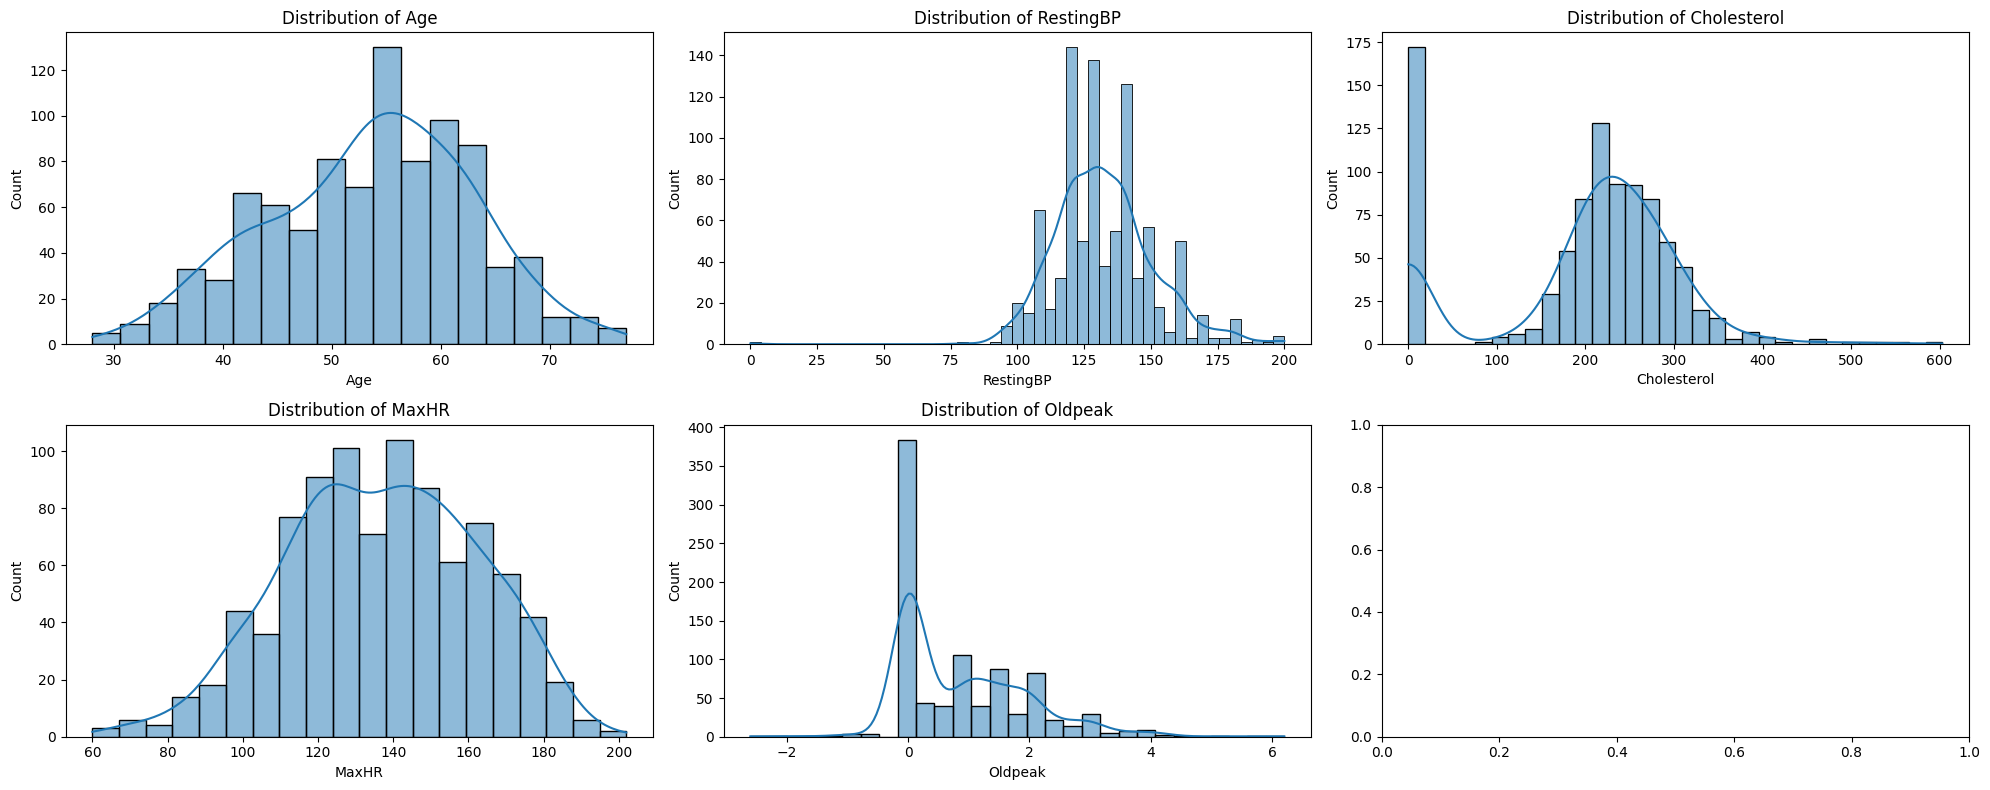

In [192]:
non_binary_features = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes = axes.ravel()
for i, feature in enumerate(non_binary_features):
    sns.histplot(data_encoded[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [193]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 642
Testing set size: 276


In [194]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# pd.DataFrame(X_train_scaled, columns=X_train.columns).head()    
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02
mean,-3.596984e-16,5.312469e-16,7.470660e-17,1.106764e-16,-4.012021e-16,1.881499e-16,-5.257131e-17,-4.150366e-17,4.842094e-17,3.389466e-17,-7.747351e-17,-4.150366e-17,1.065261e-16,-4.427058e-17,1.189772e-16
std,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00
min,-2.600129e+00,-7.146767e+00,-1.905390e+00,-5.256824e-01,-2.837829e+00,-3.173305e+00,-1.835033e+00,-4.892670e-01,-5.208523e-01,-2.095291e-01,-1.223950e+00,-4.941518e-01,-8.303455e-01,-1.025241e+00,-8.628819e-01
25%,-6.978123e-01,-6.974232e-01,-1.939840e-01,-5.256824e-01,-6.866022e-01,-8.199725e-01,5.449493e-01,-4.892670e-01,-5.208523e-01,-2.095291e-01,-1.223950e+00,-4.941518e-01,-8.303455e-01,-1.025241e+00,-8.628819e-01
50%,4.197738e-02,-1.599779e-01,1.962542e-01,-5.256824e-01,4.400324e-02,-3.674086e-01,5.449493e-01,-4.892670e-01,-5.208523e-01,-2.095291e-01,8.170266e-01,-4.941518e-01,-8.303455e-01,9.753808e-01,-8.628819e-01
75%,6.760828e-01,3.774674e-01,6.241058e-01,-5.256824e-01,7.340195e-01,5.377192e-01,5.449493e-01,-4.892670e-01,-5.208523e-01,-2.095291e-01,8.170266e-01,-4.941518e-01,1.204318e+00,9.753808e-01,1.158907e+00
max,2.472715e+00,3.602139e+00,3.764818e+00,1.902289e+00,2.235820e+00,4.791820e+00,5.449493e-01,2.043874e+00,1.919930e+00,4.772607e+00,8.170266e-01,2.023669e+00,1.204318e+00,9.753808e-01,1.158907e+00


### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [195]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [196]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)


In [197]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.2f}")
print(f"KNN (K=3) Accuracy: {accuracy_knn:.2f}")
print(f"Decision Tree (max_depth=6) Accuracy: {accuracy_dt:.2f}")

print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

print("\nKNN (K=3) Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nDecision Tree (max_depth=6) Classification Report:")
print(classification_report(y_test, y_pred_dt))

Gaussian Naive Bayes Accuracy: 0.88
KNN (K=3) Accuracy: 0.86
Decision Tree (max_depth=6) Accuracy: 0.82

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276


KNN (K=3) Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       112
           1       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276


Decision Tree (max_depth=6) Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       112
  

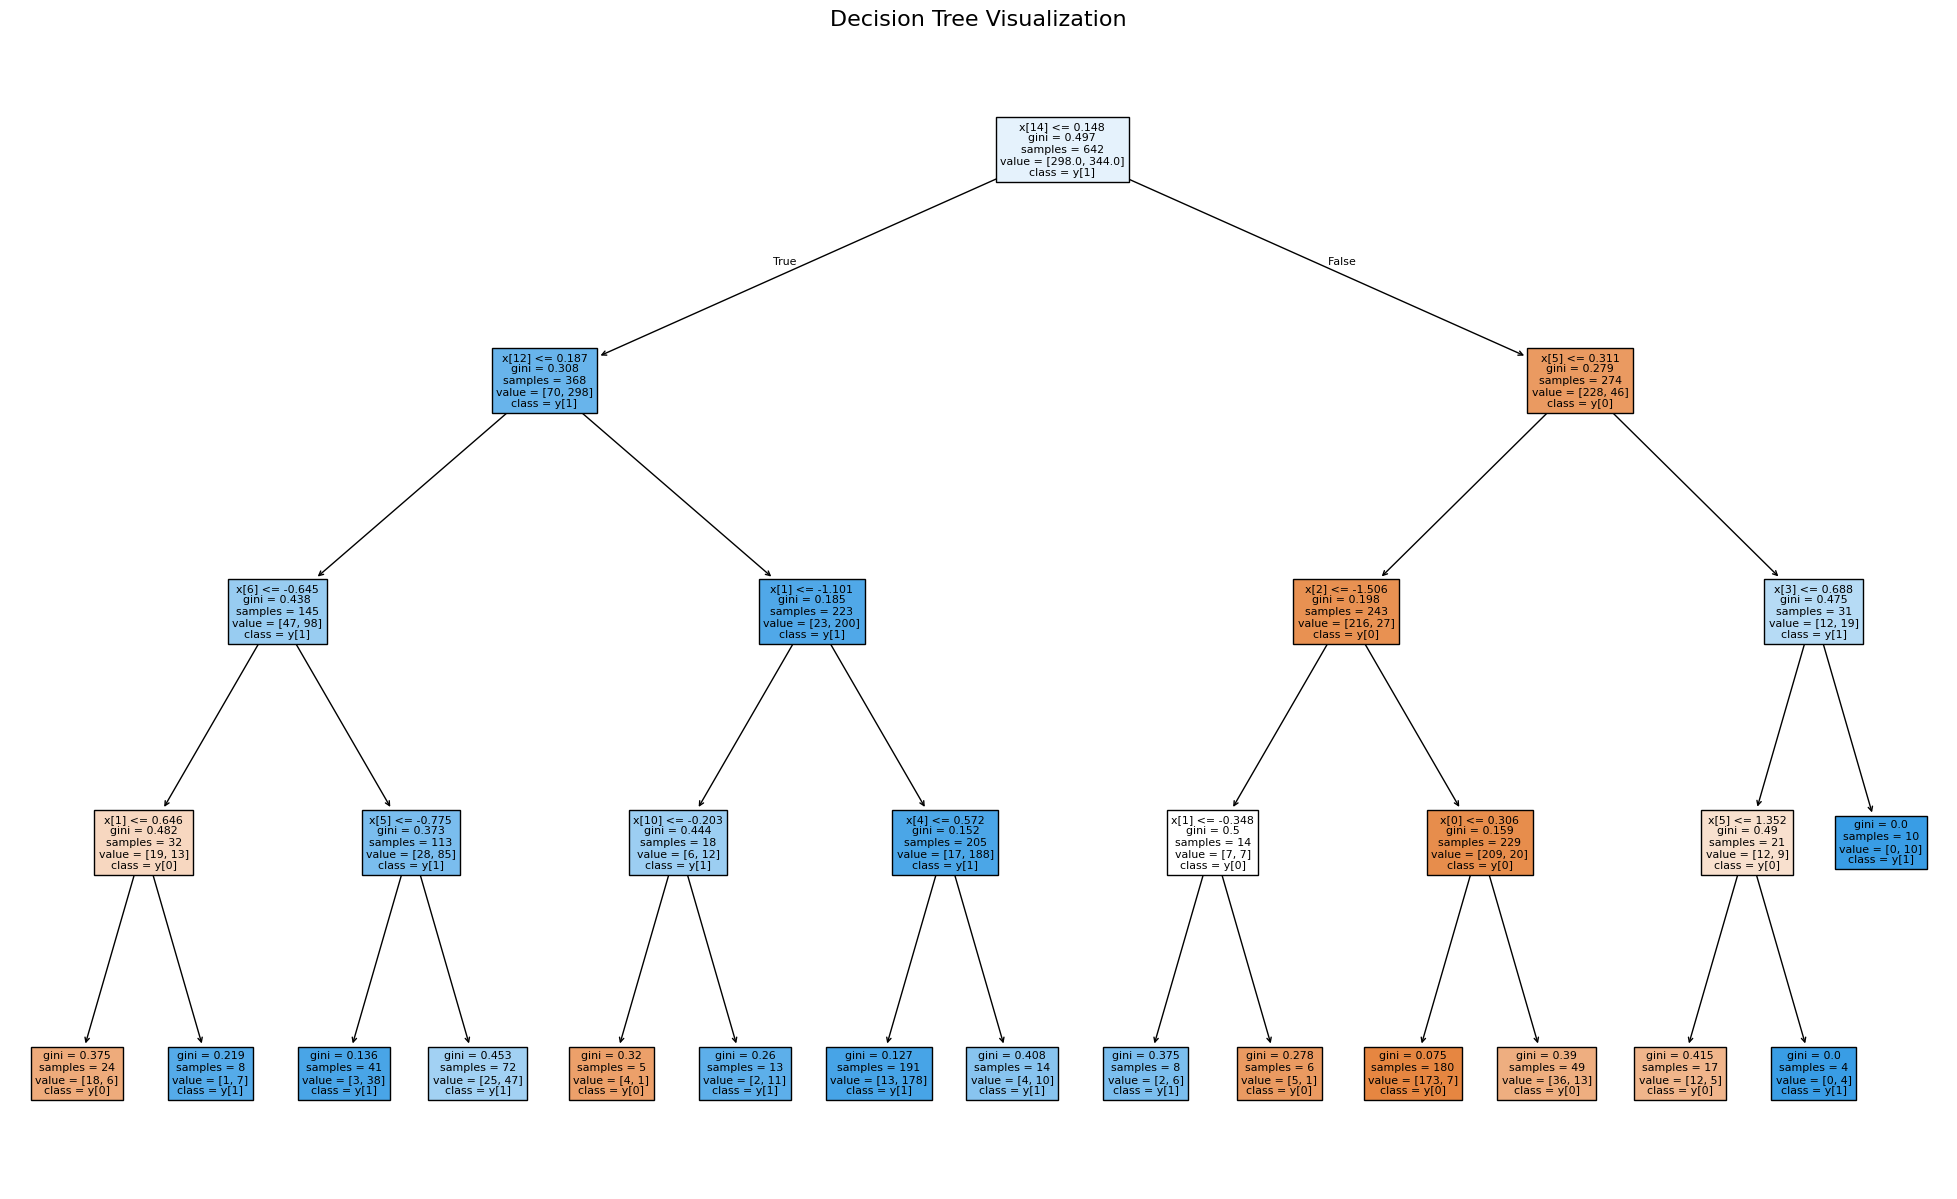

In [198]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_scaled, y_train)

plt.figure(figsize=(25, 15))
plot_tree(dt, filled=True, feature_names=None, class_names=True)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()
plt.savefig("decision_tree_visualization.png")
plt.close()


## SVM From Scratch:

In [199]:
import numpy as np
from sklearn.metrics import roc_curve, auc


class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1) # Hadi 3la -1, 1
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # No update if condition is met
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    # Update weights and bias if condition is not met
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]
        print(self.w, self.b)
    

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)
    
    def decision_function(self, X):
        return np.dot(X, self.w) + self.b
    
    def compute_roc_curve(self, X, y):
        y_scores = self.decision_function(X)  # Compute decision scores
        fpr, tpr, thresholds = roc_curve(y, y_scores)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc


### Testing SVM :

In [200]:
svm = SVM()


svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

y_pred_svm = np.where(y_pred_svm == -1, 0, 1)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

[ 0.09679471 -0.01253234 -0.20605517  0.2240775  -0.0232855   0.30255569
  0.29815197 -0.23170607 -0.28054876 -0.12572068 -0.00303184 -0.05902616
  0.32885664  0.4629631  -0.35213695] -0.17400000000000013
SVM Accuracy: 0.84


In [201]:
from sklearn.svm import SVC

svm1 = SVC()
svm1.fit(X_train_scaled, y_train)
y_pred_svm1 = svm1.predict(X_test_scaled)
y_pred_svm1 = np.where(y_pred_svm == -1, 0, 1)

accuracy_svm1 = accuracy_score(y_test, y_pred_svm1)
print(f"SVM Accuracy: {accuracy_svm1:.2f}")

SVM Accuracy: 0.59


## Ploting ROC

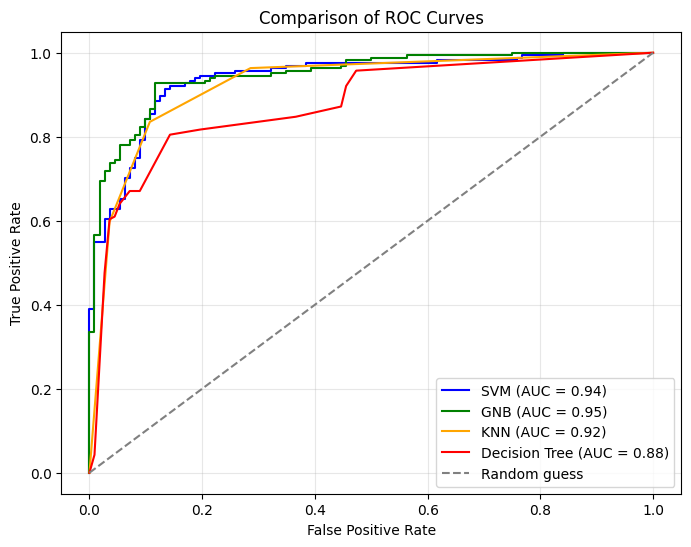

In [202]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt


# SVM
fpr_svm, tpr_svm, roc_auc_svm = svm.compute_roc_curve(X_test_scaled, y_test)

# GNB
y_scores_gnb = gnb.predict_proba(X_test_scaled)[:, 1]  # Get probability for the positive class
fpr_gnb, tpr_gnb, roc_auc_gnb = roc_curve(y_test, y_scores_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# KNN
y_scores_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Get probability for the positive class
fpr_knn, tpr_knn, roc_auc_knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Decision Tree
y_scores_dt = dt.predict_proba(X_test_scaled)[:, 1]  # Get probability for the positive class
fpr_dt, tpr_dt, roc_auc_dt = roc_curve(y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})", color="blue")
plt.plot(fpr_gnb, tpr_gnb, label=f"GNB (AUC = {roc_auc_gnb:.2f})", color="green")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})", color="orange")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})", color="red")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random guess")

# Customize the plot
plt.title("Comparison of ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# Display the plot
plt.show()


## Balanced Accuracy

In [203]:
from sklearn.metrics import confusion_matrix

def balanced_accuracy(y_true, y_pred):
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # Calculate Sensitivity (Recall) and Specificity
    sensitivity = tp / (tp + fn)  # True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    
    # Balanced Accuracy
    balanced_acc = (sensitivity + specificity) / 2
    return balanced_acc



acc = {
    'GNB': accuracy_gnb,
    'KNN': accuracy_knn,
    'DT': accuracy_dt,
    'SVM': accuracy_svm
}
acc['GNB'] = balanced_accuracy(y_test, y_pred_gnb)
acc['KNN'] = balanced_accuracy(y_test, y_pred_knn)
acc['DT'] = balanced_accuracy(y_test, y_pred_dt)
acc['SVM'] = balanced_accuracy(y_test, y_pred_svm)

print(f"Balanced Accuracy GNB: {acc['GNB']:.2f}")
print(f"Balanced Accuracy KNN: {acc['KNN']:.2f}")
print(f"Balanced Accuracy DT: {acc['DT']:.2f}")
print(f"Balanced Accuracy SVM: {acc['SVM']:.2f}")
print('#'*50)
print(f"Best Model is {max(acc, key=acc.get)} with Balanced Accuracy of {acc[max(acc, key=acc.get)]:.2f}")


Balanced Accuracy GNB: 0.88
Balanced Accuracy KNN: 0.86
Balanced Accuracy DT: 0.83
Balanced Accuracy SVM: 0.85
##################################################
Best Model is GNB with Balanced Accuracy of 0.88


## Predict the class of the third sample from the testing set based on the best-performing model.

In [205]:
# Prediction using the best model
y_pred = gnb.predict(X_test_scaled[2].reshape(1, -1))
print(f"Prediction using the best model: {y_pred[0]}")
print(f"Actual value: {y_test.iloc[2]}")

Prediction using the best model: 1
Actual value: 1


In [209]:
#  Perform the cross-validation evaluation method on the best model based on the selected metric. (Balanced Accuracy)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix
import numpy as np


balanced_accuracy = make_scorer(balanced_accuracy) ## Rani declaritha deja

# Assuming svm is your model (you can replace it with any other model)
# Perform cross-validation with the custom scoring function
cv_scores = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring=balanced_accuracy)

# Print the cross-validation scores and their mean
print(f"Balanced Accuracy for each fold: {cv_scores}")
print(f"Mean Balanced Accuracy: {np.mean(cv_scores):.2f}")


Balanced Accuracy for each fold: [0.87028986 0.87318841 0.85973962 0.79918939 0.84215686]
Mean Balanced Accuracy: 0.85
